# Convolutional neural network for image classification

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.17.1'

## Homer and Bart

### Loading Images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

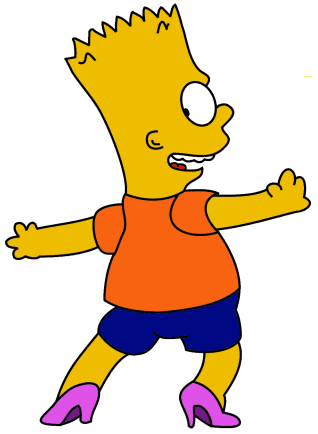

In [4]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart102.bmp')

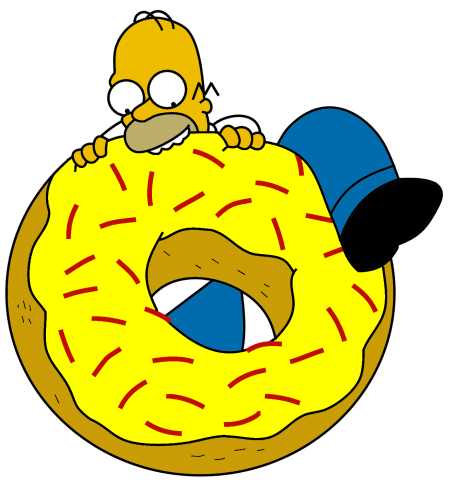

In [5]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer113.bmp')

### Train and test set

In [8]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=.2)

In [9]:
training_set = training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                      target_size=(64, 64),
                                                      batch_size=8,
                                                      class_mode='categorical',
                                                      shuffle=True)

Found 215 images belonging to 2 classes.


In [10]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
training_set.class_indices

{'bart': 0, 'homer': 1}

In [12]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                  target_size=(64, 64),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 54 images belonging to 2 classes.


### Build and train the CNN

In [14]:
(1152 + 2) / 2

577.0

In [15]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
network.add(MaxPool2D(pool_size=(2, 2)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPool2D(pool_size=(2, 2)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPool2D(pool_size=(2, 2)))

network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax'))

network.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = network.fit(x=training_set, validation_data=test_dataset, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/27 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.5080 - loss: 0.7236

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.5431 - loss: 0.7049 - val_accuracy: 0.5185 - val_loss: 0.6912
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6784 - loss: 0.5797 - val_accuracy: 0.7593 - val_loss: 0.4840
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8122 - loss: 0.4906 - val_accuracy: 0.7407 - val_loss: 0.5283
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8260 - loss: 0.4832 - val_accuracy: 0.7037 - val_loss: 0.6207
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7478 - loss: 0.4985 - val_accuracy: 0.8148 - val_loss: 0.3965
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8162 - loss: 0.3529 - val_accuracy: 0.7778 - val_loss: 0.3609
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9005 - loss: 0.2873 - val_accuracy: 0.7963 - val_loss: 0.4027
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8822 - loss: 0.2492 - val_accuracy: 0.8704 - val_loss: 

### Evaluating the network

In [19]:
predictions = np.argmax(network.predict(test_dataset), axis=1)
predictions

54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.9814814814814815

In [24]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

<Axes: >

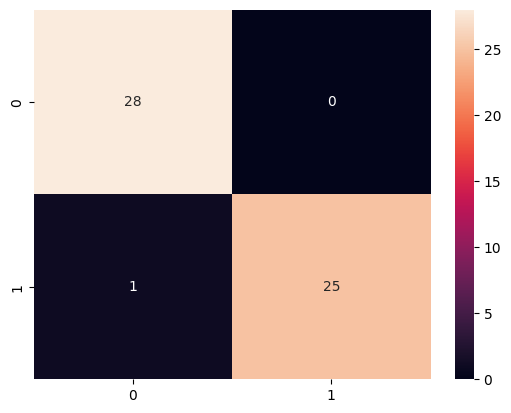

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.96      0.98        26

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### Saving and loading the model

In [26]:
model_json = network.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

In [28]:
from keras.models import save_model
save_model(network, '/content/weights.keras')

In [31]:
with open('model.json', 'r') as json_file:
  model_json = json_file.read()
model_json

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_1", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer_1"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.ini

In [33]:
network_loaded = tf.keras.models.model_from_json(model_json)
network_loaded.load_weights('/content/weights.keras')
network_loaded.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
network_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 577)                 │         665,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

### Classify one image

In [35]:
image = cv2.imread('/content/homer_bart_2/test_set/homer/homer29.bmp')

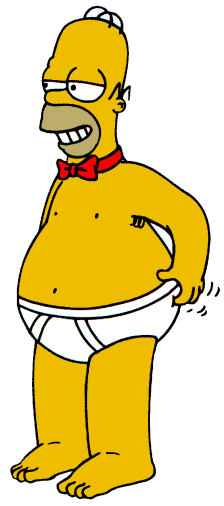

In [36]:
cv2_imshow(image)

In [37]:
image.shape

(506, 224, 3)

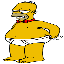

In [38]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [39]:
image = image / 255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [40]:
image.shape

(64, 64, 3)

In [42]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [43]:
result = network_loaded.predict(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


array([[0.00147648, 0.99852353]], dtype=float32)

In [44]:
result = np.argmax(result)
result

1

In [45]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [47]:
if result == 0:
  prediction = 'Bart'
else:
  prediction = 'Homer'
prediction

'Homer'

## Cat and Dog

In [48]:
path_cd = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/cat_dog_2.zip'
zip_object_cd = zipfile.ZipFile(file=path_cd, mode='r')
zip_object_cd.extractall('./')
zip_object_cd.close()

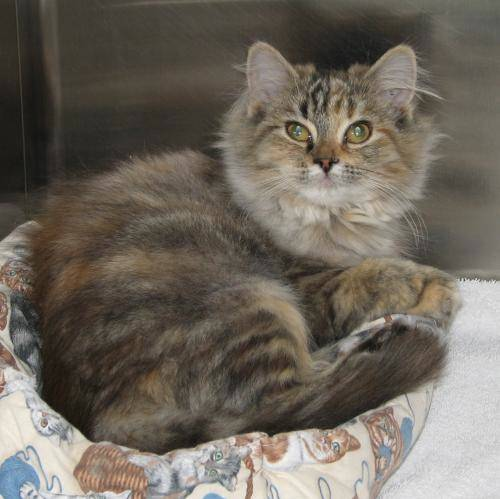

In [50]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/test_set/cat/cat.3513.jpg')

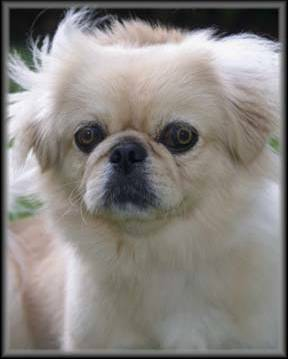

In [51]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/test_set/dog/dog.3514.jpg')

### Train and test set

In [59]:
training_generator_cd = ImageDataGenerator(rescale=1./255,
                                           rotation_range=7,
                                           horizontal_flip=True,
                                           zoom_range=.2)
training_set_cd = training_generator_cd.flow_from_directory('/content/cat_dog_2/training_set',
                                                            target_size=(64, 64),
                                                            batch_size=32,
                                                            class_mode='categorical',
                                                            shuffle=True)

Found 4000 images belonging to 2 classes.


In [60]:
training_set_cd.class_indices

{'cat': 0, 'dog': 1}

In [61]:
test_generator_cd = ImageDataGenerator(rescale=1./255)
test_dataset_cd = test_generator_cd.flow_from_directory('/content/cat_dog_2/test_set',
                                                        target_size=(64, 64),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 1000 images belonging to 2 classes.


### Build and train the CNN

In [63]:
(6272 + 2) / 2

3137.0

In [64]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
network.add(MaxPool2D(pool_size=(2, 2)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPool2D(pool_size=(2, 2)))

network.add(Flatten())

network.add(Dense(units=3137, activation='relu'))
network.add(Dense(units=3137, activation='relu'))
network.add(Dense(units=2, activation='softmax'))

network.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3137)                │      19,678,401 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3137)                │       9,843,906 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           6,276 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
history = network.fit(x=training_set_cd, validation_data=test_dataset_cd, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5201 - loss: 1.1037 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - accuracy: 0.5204 - loss: 1.0961 - val_accuracy: 0.5790 - val_loss: 0.6772
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.5827 - loss: 0.6743 - val_accuracy: 0.5960 - val_loss: 0.6632
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.5980 - loss: 0.6590 - val_accuracy: 0.6250 - val_loss: 0.6589
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.6480 - loss: 0.6385 - val_accuracy: 0.6490 - val_loss: 0.6493
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 175ms/step - accuracy: 0.6690 - loss: 0.6109 - val_accuracy: 0.6420 - val_loss: 0.6460
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 185ms/step - accuracy: 0.6753 - loss: 0.5976 - val_accuracy: 0.6790 - val_loss: 0.6053
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.6998 - loss: 0.5629 - val_accuracy: 0.6810 - val_loss: 0.6221
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.7259 - loss: 0.5419 - val

### Evaluating the network

In [81]:
test_dataset_cd.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
test_dataset_cd.class_indices

{'cat': 0, 'dog': 1}

In [83]:
predictions = network.predict(test_dataset_cd)
predictions

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[0.7940032 , 0.20599678],
       [0.76140815, 0.23859182],
       [0.58254814, 0.41745186],
       ...,
       [0.20684043, 0.7931596 ],
       [0.20142452, 0.7985756 ],
       [0.02517378, 0.9748263 ]], dtype=float32)

In [84]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset_cd.classes, predictions)

0.725

In [86]:
from sklearn. metrics import confusion_matrix
cm = confusion_matrix(test_dataset_cd.classes, predictions)
cm

array([[352, 148],
       [127, 373]])

<Axes: >

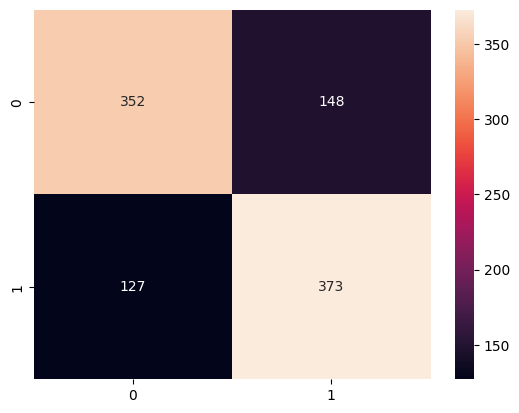

In [130]:
sns.heatmap(cm, annot=True, fmt='d')

In [89]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset_cd.classes, predictions))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       500
           1       0.72      0.75      0.73       500

    accuracy                           0.72      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.73      0.72      0.72      1000



### Saving and loading the model

In [90]:
model_json = network.to_json()
with open('model_cd.json', 'w') as json_file:
  json_file.write(model_json)

In [91]:
from keras.models import save_model
save_model(network, '/content/weights_cd.keras')

In [92]:
with open('model_cd.json', 'r') as json_file:
  model_json = json_file.read()
model_json

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer_3"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_8", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.ini

In [93]:
network_loaded = tf.keras.models.model_from_json(model_json)
network_loaded.load_weights('/content/weights_cd.keras')
network_loaded.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
network_loaded.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3137)                │      19,678,401 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3137)                │       9,843,906 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           6,276 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

### Classify one image

In [118]:
image = cv2.imread('/content/cat_dog_2/test_set/cat/cat.3502.jpg')

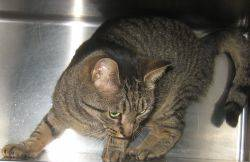

In [119]:
cv2_imshow(image)

In [120]:
image.shape

(162, 250, 3)

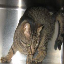

In [121]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [122]:
image = image / 255
image

array([[[0.38431373, 0.40784314, 0.42745098],
        [0.36078431, 0.38431373, 0.40392157],
        [0.32941176, 0.35294118, 0.37254902],
        ...,
        [0.10588235, 0.1372549 , 0.14901961],
        [0.09019608, 0.12156863, 0.12156863],
        [0.07058824, 0.10196078, 0.10196078]],

       [[0.40784314, 0.43137255, 0.45098039],
        [0.37647059, 0.4       , 0.41960784],
        [0.34117647, 0.36470588, 0.38431373],
        ...,
        [0.10588235, 0.14117647, 0.14117647],
        [0.08627451, 0.11764706, 0.11764706],
        [0.0627451 , 0.09411765, 0.09411765]],

       [[0.41568627, 0.43921569, 0.45882353],
        [0.37647059, 0.4       , 0.41960784],
        [0.34901961, 0.37254902, 0.39215686],
        ...,
        [0.10196078, 0.13333333, 0.1372549 ],
        [0.08627451, 0.10980392, 0.11372549],
        [0.06666667, 0.09019608, 0.09019608]],

       ...,

       [[0.69803922, 0.78431373, 0.84313725],
        [0.37254902, 0.50980392, 0.58039216],
        [0.31764706, 0

In [123]:
image.shape

(64, 64, 3)

In [124]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [125]:
result = network_loaded.predict(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step  


array([[0.60765934, 0.3923407 ]], dtype=float32)

In [126]:
result = np.argmax(result)
result

0

In [127]:
test_dataset_cd.class_indices

{'cat': 0, 'dog': 1}

In [128]:
if result == 0:
  prediction = 'Cat'
else:
  prediction = 'Dog'
prediction

'Cat'